In [1]:
key = "PKWRXZJ9S5YXFJFTSBHM"
secret = "SJsWjiQcyd2UWekIDNvN1qT7WeYizcVJgroj78PU"
url = "https://paper-api.alpaca.markets"

In [2]:
import alpaca_trade_api as api
import alpaca_trade_api.rest as rapi

In [12]:
import pandas as pd

In [3]:
rest = api.REST(key, secret, url)

In [16]:
bars = rest.get_bars("spy", rapi.TimeFrame.Minute, "2021-01-01", "2021-12-31")

bars_ = [bar._raw for bar in bars]

x = pd.DataFrame(bars_)

In [17]:
x

,t,o,h,l,c,v,n,vw
0,2021-01-04T09:00:00Z,375.64,375.69,375.64,375.69,2606,21,375.678688
1,2021-01-04T09:01:00Z,375.69,375.81,375.69,375.79,16041,44,375.791473
2,2021-01-04T09:02:00Z,375.84,375.88,375.79,375.82,12514,27,375.834458
3,2021-01-04T09:04:00Z,375.90,376.04,375.90,375.91,8995,46,376.004726
4,2021-01-04T09:05:00Z,375.90,375.90,375.88,375.88,4550,10,375.893297
...,...,...,...,...,...,...,...,...
205318,2022-01-01T00:53:00Z,475.23,475.23,475.20,475.23,2750,9,475.228727
205319,2022-01-01T00:54:00Z,475.23,475.23,475.22,475.23,500,3,475.228000
205320,2022-01-01T00:55:00Z,475.23,475.23,475.23,475.23,544,4,475.230000
205321,2022-01-01T00:58:00Z,475.13,475.13,475.09,475.09,8832,12,475.094774


In [18]:
x.to_csv("spy-2021.csv")

In [19]:
prev = 5
groups = [x, ] + [x.shift(1).rename(lambda x: x+f"{n}", axis=1) for n in range(1, prev+1) ]
xx = pd.concat(groups, axis=1)

In [20]:
xx

,t,o,h,l,c,v,n,vw,t1,o1,...,n4,vw4,t5,o5,h5,l5,c5,v5,n5,vw5
0,2021-01-04T09:00:00Z,375.64,375.69,375.64,375.69,2606,21,375.678688,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-04T09:01:00Z,375.69,375.81,375.69,375.79,16041,44,375.791473,2021-01-04T09:00:00Z,375.64,...,21.0,375.678688,2021-01-04T09:00:00Z,375.64,375.69,375.64,375.69,2606.0,21.0,375.678688
2,2021-01-04T09:02:00Z,375.84,375.88,375.79,375.82,12514,27,375.834458,2021-01-04T09:01:00Z,375.69,...,44.0,375.791473,2021-01-04T09:01:00Z,375.69,375.81,375.69,375.79,16041.0,44.0,375.791473
3,2021-01-04T09:04:00Z,375.90,376.04,375.90,375.91,8995,46,376.004726,2021-01-04T09:02:00Z,375.84,...,27.0,375.834458,2021-01-04T09:02:00Z,375.84,375.88,375.79,375.82,12514.0,27.0,375.834458
4,2021-01-04T09:05:00Z,375.90,375.90,375.88,375.88,4550,10,375.893297,2021-01-04T09:04:00Z,375.90,...,46.0,376.004726,2021-01-04T09:04:00Z,375.90,376.04,375.90,375.91,8995.0,46.0,376.004726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205318,2022-01-01T00:53:00Z,475.23,475.23,475.20,475.23,2750,9,475.228727,2022-01-01T00:52:00Z,475.23,...,7.0,475.224316,2022-01-01T00:52:00Z,475.23,475.23,475.19,475.23,1031.0,7.0,475.224316
205319,2022-01-01T00:54:00Z,475.23,475.23,475.22,475.23,500,3,475.228000,2022-01-01T00:53:00Z,475.23,...,9.0,475.228727,2022-01-01T00:53:00Z,475.23,475.23,475.20,475.23,2750.0,9.0,475.228727
205320,2022-01-01T00:55:00Z,475.23,475.23,475.23,475.23,544,4,475.230000,2022-01-01T00:54:00Z,475.23,...,3.0,475.228000,2022-01-01T00:54:00Z,475.23,475.23,475.22,475.23,500.0,3.0,475.228000
205321,2022-01-01T00:58:00Z,475.13,475.13,475.09,475.09,8832,12,475.094774,2022-01-01T00:55:00Z,475.23,...,4.0,475.230000,2022-01-01T00:55:00Z,475.23,475.23,475.23,475.23,544.0,4.0,475.230000


In [63]:
xx["delta"] = xx["vw"]/xx["vw1"] - 1

In [64]:
xx["delta1"] = xx["vw1"]/xx["vw2"] - 1

<AxesSubplot:ylabel='Frequency'>

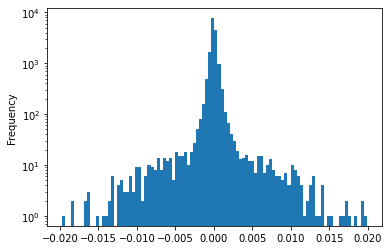

In [65]:
xx.delta.plot.hist(bins=100, log=True)

<AxesSubplot:ylabel='Frequency'>

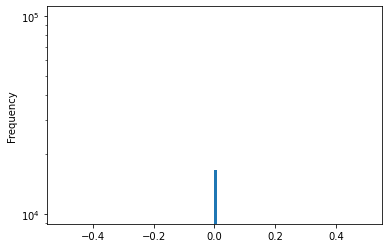

In [66]:
xx.delta1.plot.hist(bins=100, log=True)

In [60]:
xx

,t,o,h,l,c,v,n,vw,t1,o1,...,n1,vw1,t1,o1,h1,l1,c1,v1,n1,vw1
0,2022-01-03T09:00:00Z,476.3800,476.92,476.3800,476.67,7790,68,476.675981,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-03T09:01:00Z,476.6700,476.67,476.6700,476.67,116,7,476.670000,2022-01-03T09:00:00Z,476.3800,...,68.0,476.675981,2022-01-03T09:00:00Z,476.3800,476.92,476.3800,476.67,7790.0,68.0,476.675981
2,2022-01-03T09:02:00Z,476.6300,476.63,476.6000,476.60,410,13,476.645049,2022-01-03T09:01:00Z,476.6700,...,7.0,476.670000,2022-01-03T09:01:00Z,476.6700,476.67,476.6700,476.67,116.0,7.0,476.670000
3,2022-01-03T09:03:00Z,476.5800,476.58,476.4800,476.56,708,17,476.539633,2022-01-03T09:02:00Z,476.6300,...,13.0,476.645049,2022-01-03T09:02:00Z,476.6300,476.63,476.6000,476.60,410.0,13.0,476.645049
4,2022-01-03T09:04:00Z,476.5000,476.56,476.5000,476.56,402,10,476.530149,2022-01-03T09:03:00Z,476.5800,...,17.0,476.539633,2022-01-03T09:03:00Z,476.5800,476.58,476.4800,476.56,708.0,17.0,476.539633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16624,2022-01-29T00:55:00Z,442.3100,442.31,442.0000,442.15,5592,55,442.182101,2022-01-29T00:54:00Z,442.2800,...,14.0,442.303156,2022-01-29T00:54:00Z,442.2800,442.32,442.2800,442.30,1445.0,14.0,442.303156
16625,2022-01-29T00:56:00Z,442.1001,442.20,442.1001,442.20,5955,22,442.194601,2022-01-29T00:55:00Z,442.3100,...,55.0,442.182101,2022-01-29T00:55:00Z,442.3100,442.31,442.0000,442.15,5592.0,55.0,442.182101
16626,2022-01-29T00:57:00Z,442.2500,442.30,442.2500,442.30,2032,17,442.285546,2022-01-29T00:56:00Z,442.1001,...,22.0,442.194601,2022-01-29T00:56:00Z,442.1001,442.20,442.1001,442.20,5955.0,22.0,442.194601
16627,2022-01-29T00:58:00Z,442.3000,442.30,442.2200,442.22,559,9,442.263005,2022-01-29T00:57:00Z,442.2500,...,17.0,442.285546,2022-01-29T00:57:00Z,442.2500,442.30,442.2500,442.30,2032.0,17.0,442.285546


In [67]:
xx

,t,o,h,l,c,v,n,vw,t1,o1,...,t2,o2,h2,l2,c2,v2,n2,vw2,delta,delta1
0,2022-01-03T09:00:00Z,476.3800,476.92,476.3800,476.67,7790,68,476.675981,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-03T09:01:00Z,476.6700,476.67,476.6700,476.67,116,7,476.670000,2022-01-03T09:00:00Z,476.3800,...,2022-01-03T09:00:00Z,476.3800,476.92,476.3800,476.67,7790.0,68.0,476.675981,-0.000013,0.0
2,2022-01-03T09:02:00Z,476.6300,476.63,476.6000,476.60,410,13,476.645049,2022-01-03T09:01:00Z,476.6700,...,2022-01-03T09:01:00Z,476.6700,476.67,476.6700,476.67,116.0,7.0,476.670000,-0.000052,0.0
3,2022-01-03T09:03:00Z,476.5800,476.58,476.4800,476.56,708,17,476.539633,2022-01-03T09:02:00Z,476.6300,...,2022-01-03T09:02:00Z,476.6300,476.63,476.6000,476.60,410.0,13.0,476.645049,-0.000221,0.0
4,2022-01-03T09:04:00Z,476.5000,476.56,476.5000,476.56,402,10,476.530149,2022-01-03T09:03:00Z,476.5800,...,2022-01-03T09:03:00Z,476.5800,476.58,476.4800,476.56,708.0,17.0,476.539633,-0.000020,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16624,2022-01-29T00:55:00Z,442.3100,442.31,442.0000,442.15,5592,55,442.182101,2022-01-29T00:54:00Z,442.2800,...,2022-01-29T00:54:00Z,442.2800,442.32,442.2800,442.30,1445.0,14.0,442.303156,-0.000274,0.0
16625,2022-01-29T00:56:00Z,442.1001,442.20,442.1001,442.20,5955,22,442.194601,2022-01-29T00:55:00Z,442.3100,...,2022-01-29T00:55:00Z,442.3100,442.31,442.0000,442.15,5592.0,55.0,442.182101,0.000028,0.0
16626,2022-01-29T00:57:00Z,442.2500,442.30,442.2500,442.30,2032,17,442.285546,2022-01-29T00:56:00Z,442.1001,...,2022-01-29T00:56:00Z,442.1001,442.20,442.1001,442.20,5955.0,22.0,442.194601,0.000206,0.0
16627,2022-01-29T00:58:00Z,442.3000,442.30,442.2200,442.22,559,9,442.263005,2022-01-29T00:57:00Z,442.2500,...,2022-01-29T00:57:00Z,442.2500,442.30,442.2500,442.30,2032.0,17.0,442.285546,-0.000051,0.0
